In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from pandas.tools.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM,Dense
%matplotlib inline

In [3]:
data=pd.read_csv("File-2.csv")
data.head(12)

,Month,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,January,8414,7939,8847,8584,7371,7415,8404,7377,8980,...,12378,10930,12064,13609,13822,14435,15292,16312,NaN,NaN
1,February,9767,9283,8614,8719,8921,8881,9704,7361,11120,...,14087,12184,11990,14386,13669,14024,17430,16139,NaN,NaN
2,March,13805,12934,12169,17108,12462,11768,13326,11511,12918,...,17213,15920,16243,19980,20686,20637,21284,24687,NaN,NaN
3,April,12987,13432,14481,14771,11772,11469,11136,12852,13286,...,21058,19076,18196,23672,21505,25723,23174,31056,NaN,NaN
4,May,32190,28900,30002,31103,29342,24840,24642,28128,28798,...,32541,33115,34192,43832,42213,48097,47387,54275,NaN,NaN
5,June,46383,43848,52654,45349,42663,41663,55157,46405,56459,...,41465,44528,44922,57579,61807,61712,64508,80087,NaN,NaN
6,July,57570,54320,60910,52238,49202,57045,55844,54063,62448,...,54774,56094,63800,61226,66723,65568,70482,84381,NaN,NaN
7,August,52261,49702,47948,41221,47947,47552,47127,45320,49569,...,46913,49274,62313,51320,58573,73357,63325,82593,NaN,NaN
8,September,30125,32182,30847,27665,25626,29737,30434,31033,30584,...,34062,37426,36428,38122,39311,41881,43456,53472,NaN,NaN
9,October,17522,17691,15916,18433,14684,15763,15558,18382,18436,...,23399,23464,30162,27210,26704,25587,30639,30361,NaN,NaN


In [4]:
data=data.drop(['Month'],axis=1)

In [5]:
data.describe()

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,0.0,0.0
mean,25080.00000,24184.166667,25290.000000,23607.833333,22314.750000,22893.666667,24106.916667,23839.833333,26580.916667,27545.750000,...,27641.250000,28822.916667,30565.500000,32229.833333,33549.666667,35813.250000,36881.583333,43518.000000,NaN,NaN
std,18186.16863,17088.698817,18959.685915,15667.452667,16215.749029,17300.951436,18625.949320,16793.889678,19237.015051,21559.770433,...,14174.342506,15125.446196,18396.157709,17456.750493,19586.275869,21477.312868,20127.410679,26375.827391,NaN,NaN
min,7285.00000,7939.000000,8307.000000,7228.000000,6808.000000,7415.000000,7380.000000,7361.000000,8980.000000,8179.000000,...,12378.000000,10930.000000,11990.000000,13609.000000,13669.000000,14024.000000,15292.000000,16139.000000,NaN,NaN
25%,11930.00000,11195.500000,11338.500000,10336.000000,10464.500000,10302.250000,10354.250000,10920.000000,12600.750000,11172.750000,...,16431.500000,17366.750000,16341.250000,18868.250000,19680.750000,19724.250000,22316.750000,24369.500000,NaN,NaN
50%,15663.50000,15561.500000,15198.500000,17770.500000,13573.000000,13765.500000,14442.000000,16440.500000,16580.000000,16001.000000,...,22228.500000,24739.500000,25132.000000,25441.000000,24104.500000,25655.000000,26906.500000,30708.500000,NaN,NaN
75%,35738.25000,35098.500000,35122.250000,33632.500000,32672.250000,32718.500000,34607.250000,34604.750000,35330.250000,38385.000000,...,35912.750000,39201.500000,38551.500000,45704.000000,46303.000000,51500.750000,51371.500000,60728.000000,NaN,NaN
max,57570.00000,54320.000000,60910.000000,52238.000000,49202.000000,57045.000000,55844.000000,54063.000000,62448.000000,64896.000000,...,54774.000000,56094.000000,63800.000000,61226.000000,66723.000000,73357.000000,70482.000000,84381.000000,NaN,NaN


Text(0.5,1,'Average No of people staying per year')

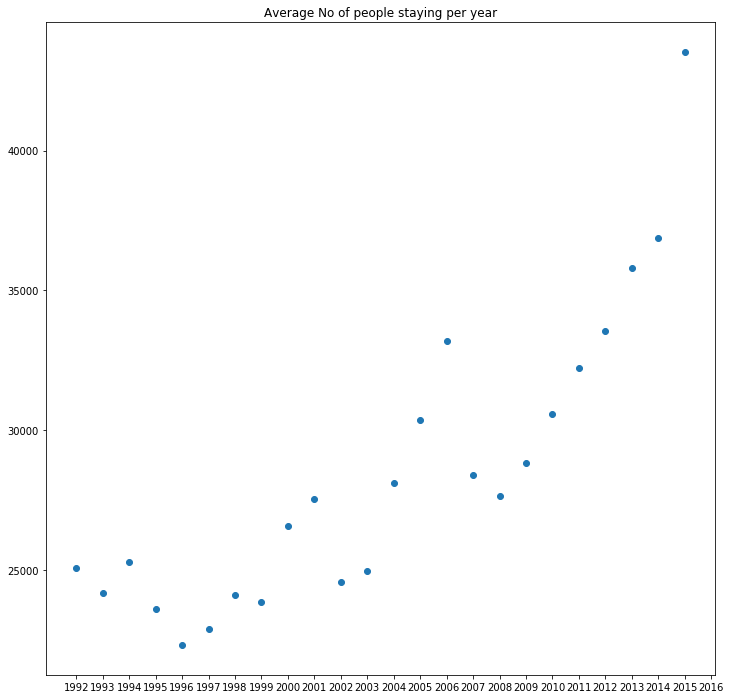

In [120]:
plt.figure(figsize=(12,12))
no=range(len(data.mean()))
plt.scatter(list(data.columns.values),data.mean())
plt.title("Average No of people staying per year")

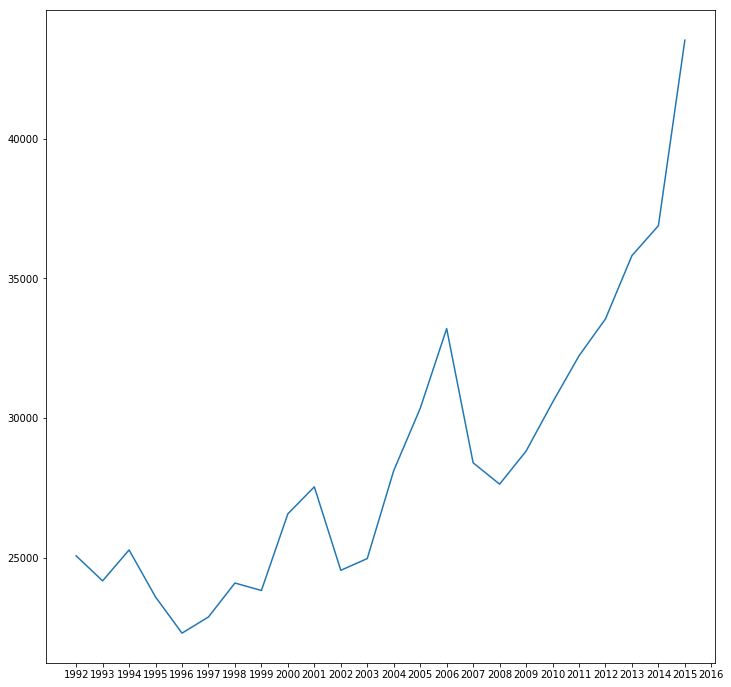

In [8]:
plt.figure(figsize=(12,12))
plt.plot(data.mean())
plt.title("Average no of people visiting")

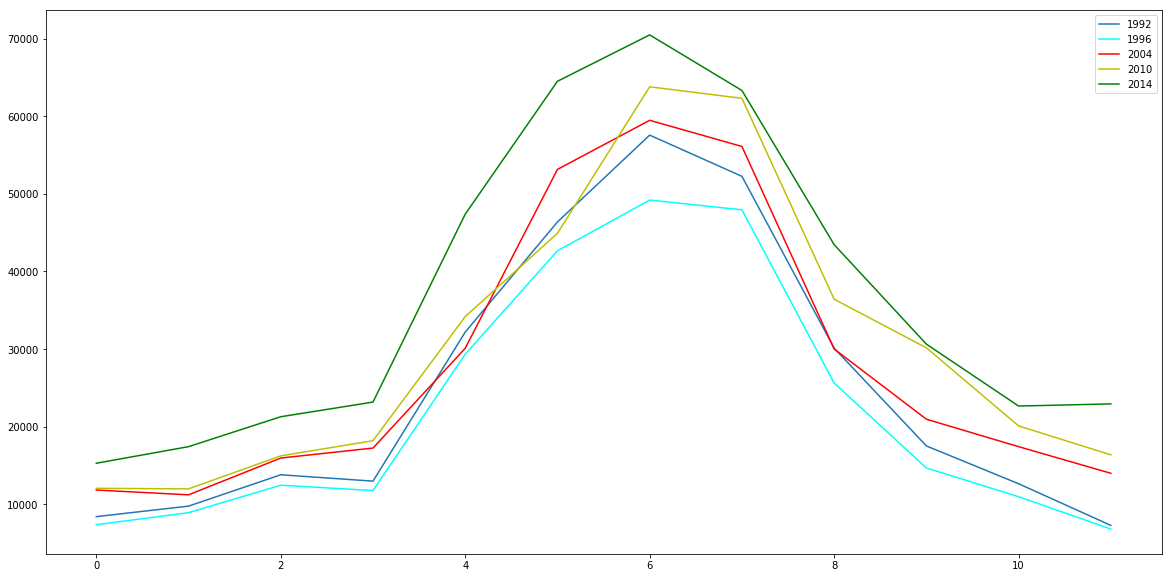

In [9]:
plt.figure(figsize=(20,10))
plt.plot(data['1992'])
plt.plot(data['1996'],color='cyan')
plt.plot(data['2004'],color='r')
plt.plot(data['2010'],color='y')
plt.plot(data['2014'],color='g')
plt.legend()

In [9]:
dummy=[]
for i in list(data.columns.values)[:-2]:
    dummy.append(list(data[i]))
Series=[j for i in dummy for j in i]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


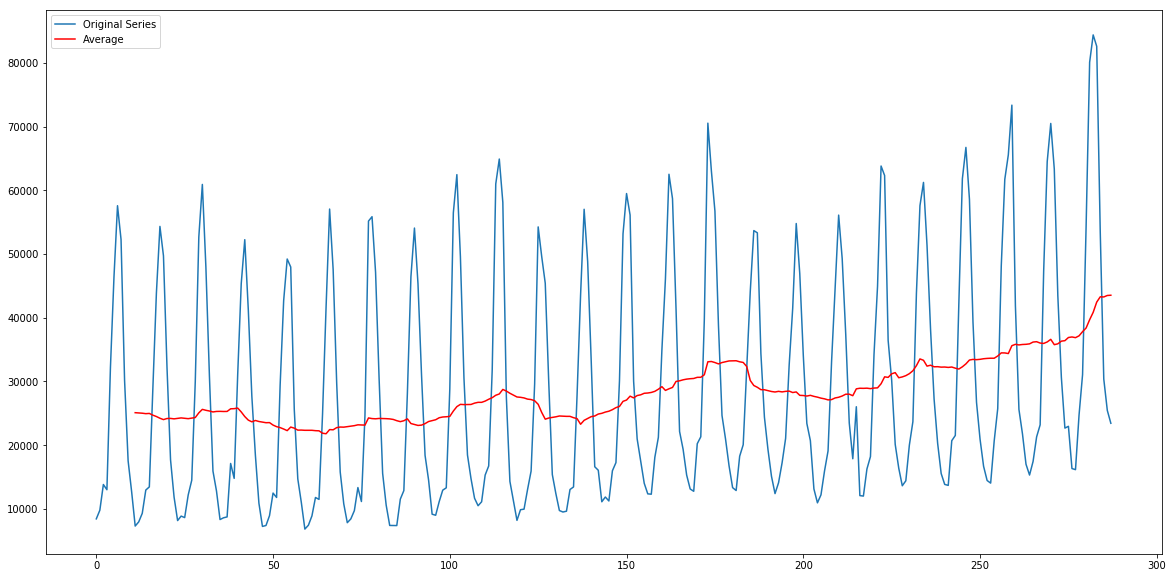

In [160]:
series=pd.Series(Series)
moving_avg = pd.rolling_mean(series,12)
plt.figure(figsize=(20,10))
plt.plot(Series,label='Original Series')
plt.plot(moving_avg,color='r',label='Average')
plt.legend()

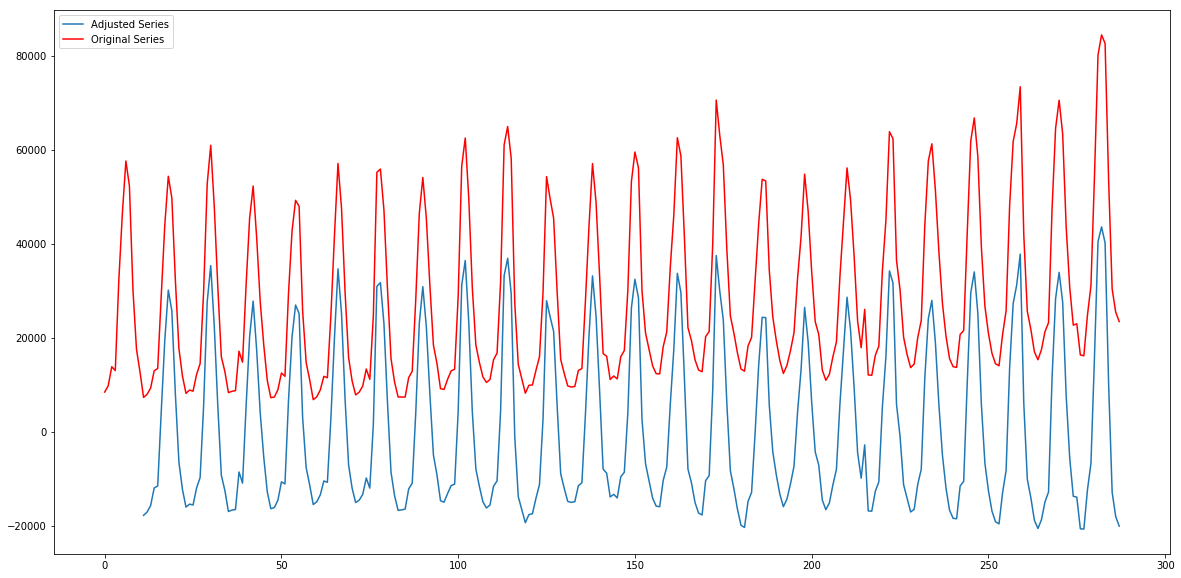

In [161]:
adjusted=series-moving_avg
plt.figure(figsize=(20,10))
plt.plot(adjusted,label='Adjusted Series')
plt.plot(series,color='r',label='Original Series')
plt.legend()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


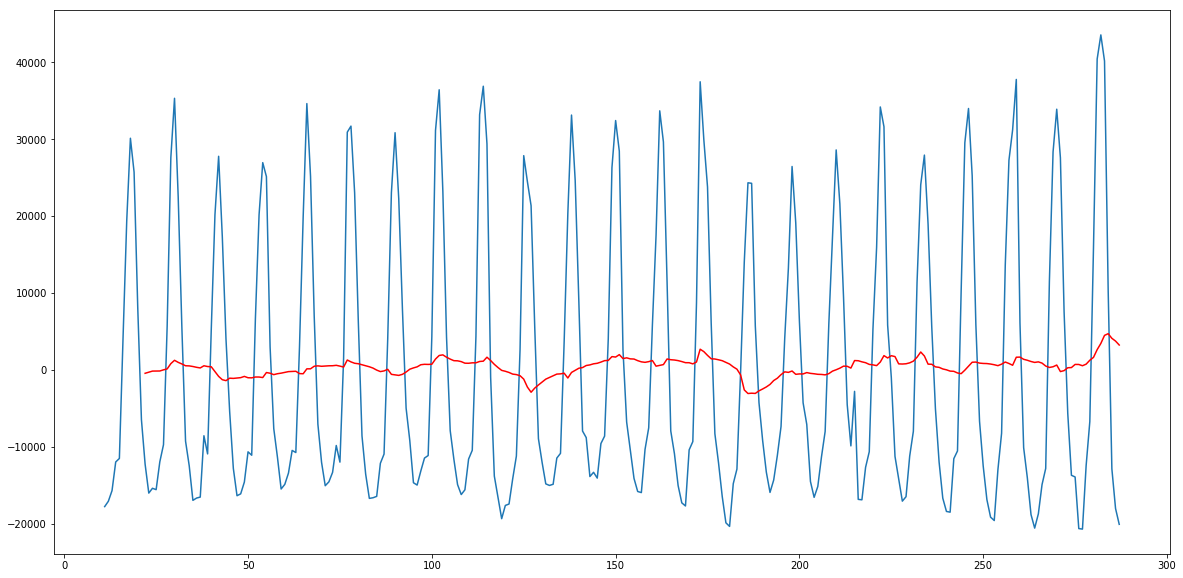

In [162]:
moving_avg = pd.rolling_mean(adjusted,12)
plt.figure(figsize=(20,10))
plt.plot(adjusted)
plt.plot(moving_avg,color='r')



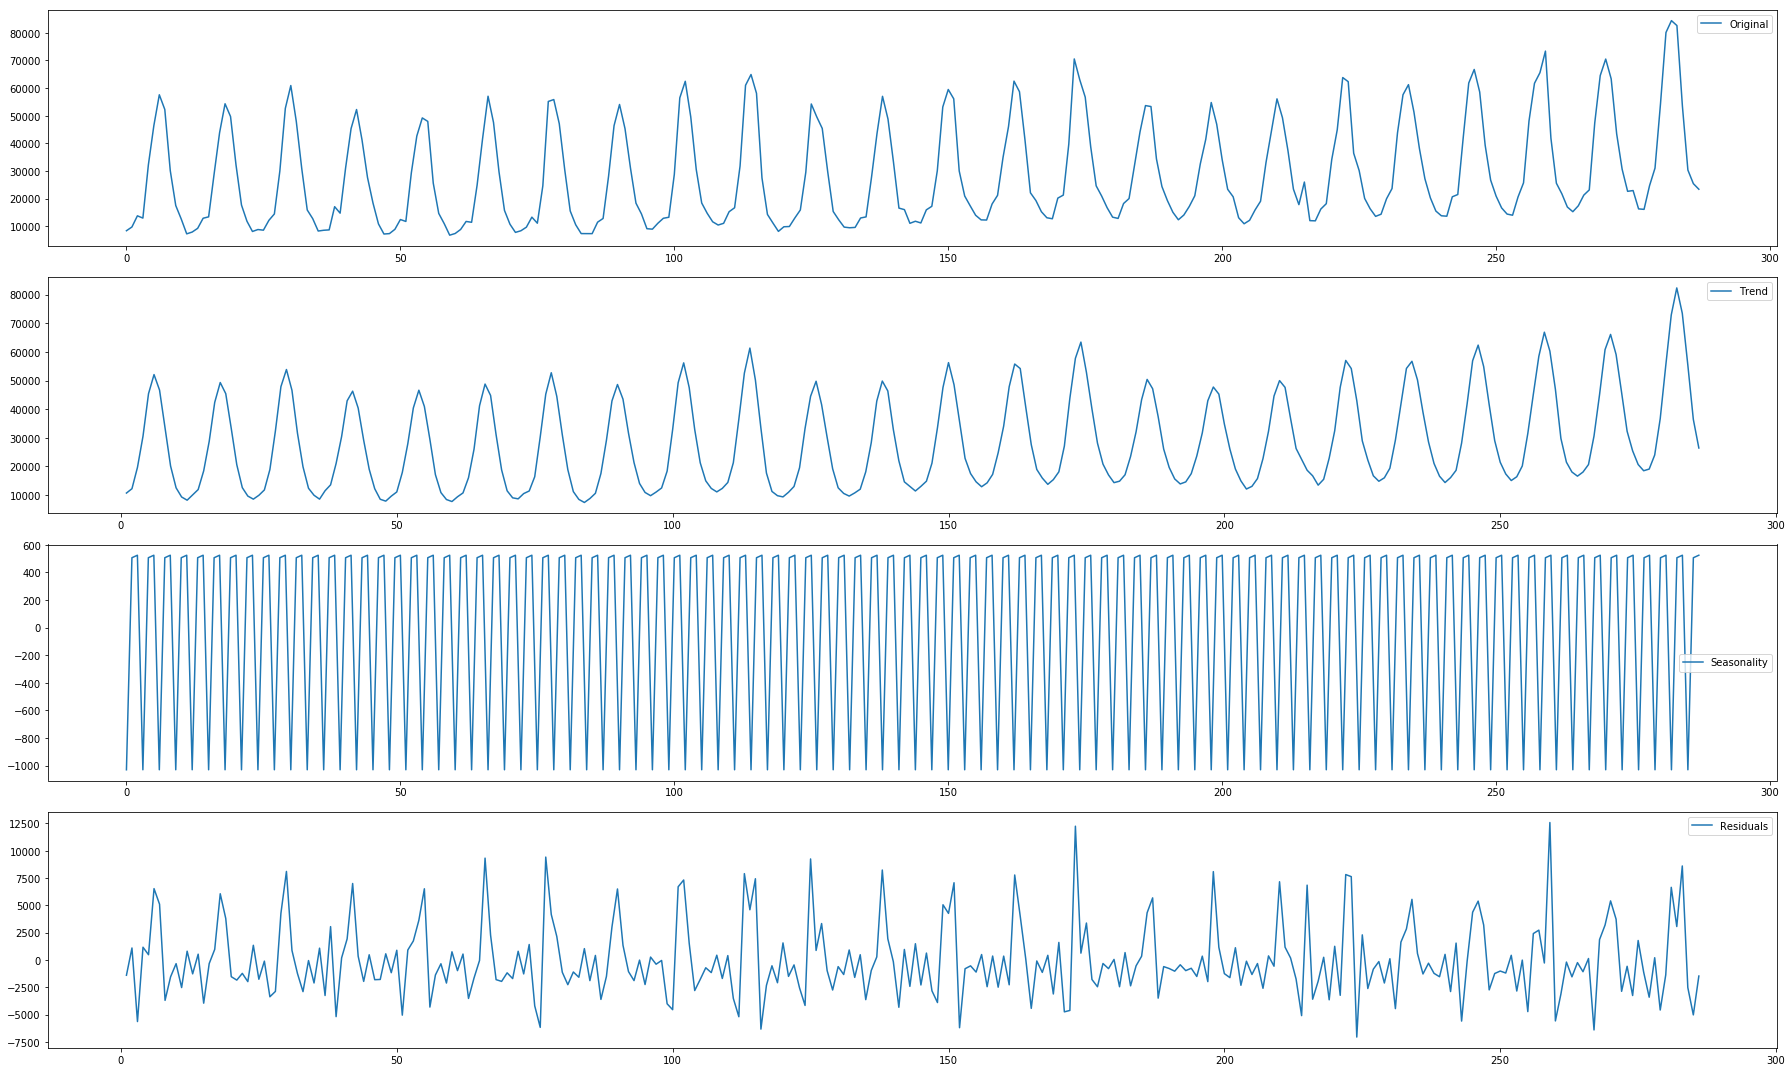

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.asarray(series),freq=3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(25,15))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


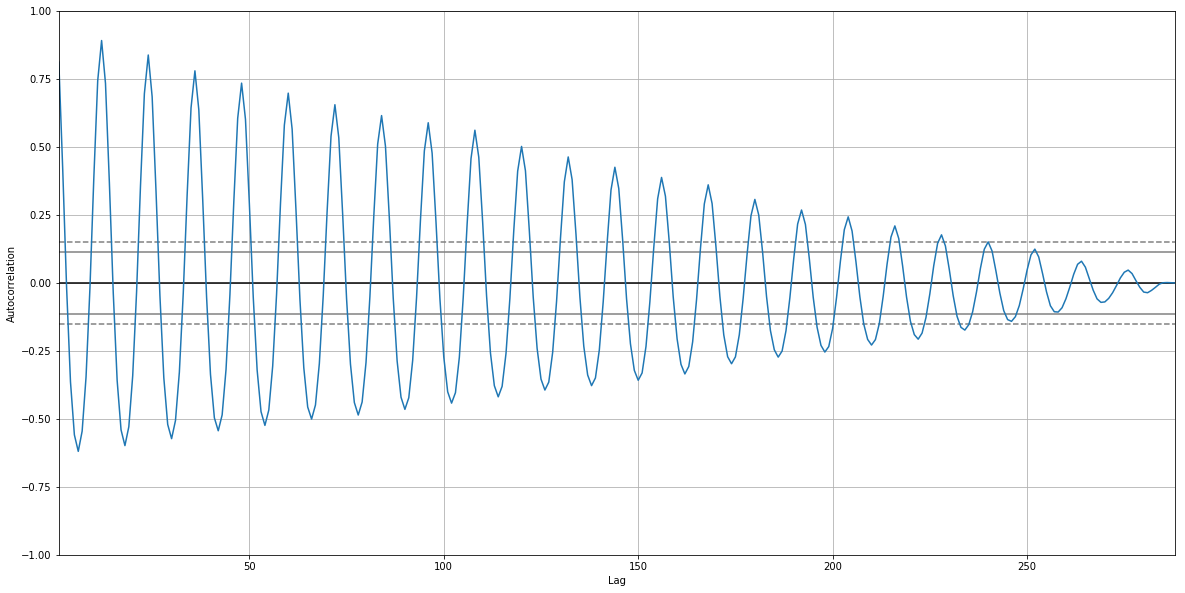

In [164]:
plt.figure(figsize=(20,10))
autocorrelation_plot(series)

In [194]:
inp=np.reshape(np.asarray(series[:-1]),(287,1))
out=np.reshape(np.asarray(series[1:]),(287,1))
mean=np.mean(inp)

In [195]:
print(np.mean(inp))
inp=inp/np.mean(inp)
out=inp/np.mean(inp)

28521.728223


In [196]:
X_train,X_test,Y_train,Y_test=train_test_split(inp,out,test_size=0.3)

In [197]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))

In [198]:
model = Sequential()
model.add(LSTM(6, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adagrad')
model.fit(X_train,Y_train, epochs=20, batch_size=1)

Epoch 1/20
200/200 [==============================] - 3s - loss: 0.4896     
Epoch 2/20
200/200 [==============================] - 1s - loss: 0.2204     
Epoch 3/20
200/200 [==============================] - 1s - loss: 0.1561     
Epoch 4/20
200/200 [==============================] - 1s - loss: 0.1256     
Epoch 5/20
200/200 [==============================] - 1s - loss: 0.1045     
Epoch 6/20
200/200 [==============================] - 1s - loss: 0.0882     
Epoch 7/20
200/200 [==============================] - 1s - loss: 0.0745     
Epoch 8/20
200/200 [==============================] - 1s - loss: 0.0628     
Epoch 9/20
200/200 [==============================] - 1s - loss: 0.0528     
Epoch 10/20
200/200 [==============================] - 1s - loss: 0.0443     
Epoch 11/20
200/200 [==============================] - 1s - loss: 0.0370     
Epoch 12/20
200/200 [==============================] - 1s - loss: 0.0309     
Epoch 13/20
200/200 [==============================] - 1s - loss: 0.0258 

In [199]:
preds=model.predict(X_test)
complete_pred=model.predict(X_train)

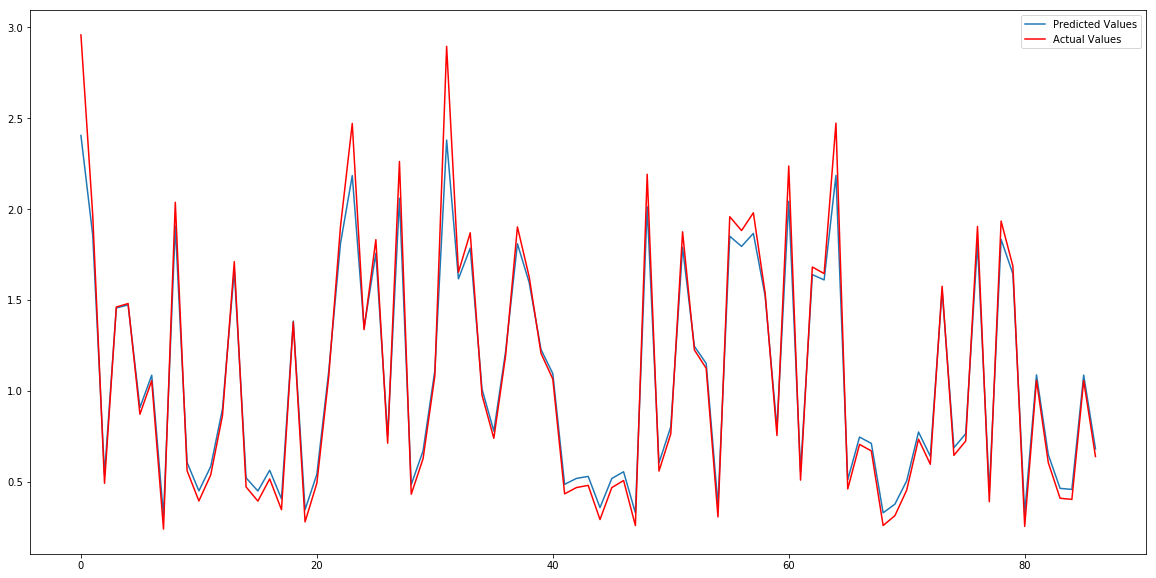

In [200]:
plt.figure(figsize=(20,10))
plt.plot(preds,label="Predicted Values")
plt.plot(Y_test,color='r',label="Actual Values")
plt.legend()